In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# connecting to the file
df = pd.read_csv('/Users/ilayarajamani/Downloads/customer_shopping_data.csv.zip')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
#Size and info of data
print(f"The size of the data is {df.shape}")
print(f"The data have  {df.shape[0]} rows and {df.shape[1]} columns.")
print()
print(f"The overall information of the data:")
print()
print(df.info())

The size of the data is (99457, 10)
The data have  99457 rows and 10 columns.

The overall information of the data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [4]:
# Checking if there is missing values
sum(df.isnull().sum())

0

In [5]:
# Checking removing duplicates
print(f"We have {df.duplicated().sum()} duplicate values.")

We have 0 duplicate values.


In [6]:
# Checking Unique Values
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

In [7]:
#Describing data, Summary statistics
print("Summary Statistics for Numerical Columns:")
print(df.describe())

Summary Statistics for Numerical Columns:
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


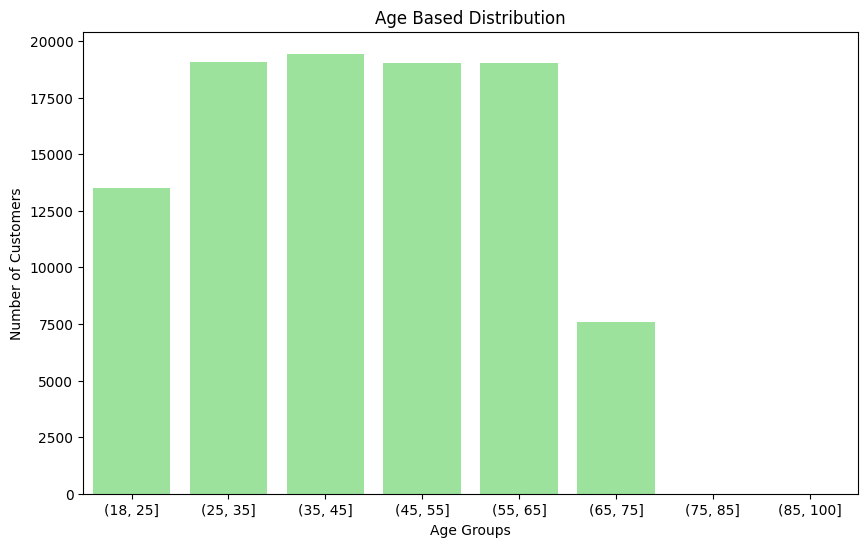


Average age of customers: 43
Aveage age group: (35, 45]


In [8]:
# Distribution of customer based on Age

age_bins = [18,25,35,45,55,65,75,85,100]    #Creating age bins
df['age_group'] = pd.cut(df['age'], bins = age_bins)

age_distribution = df['age_group'].value_counts()

plt.figure(figsize = (10,6))

sns.barplot(x=age_distribution.index, y = age_distribution.values, color = 'lightgreen')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.title('Age Based Distribution')
plt.xticks(rotation= 0)
plt.show()
print()
print(f"Average age of customers: {df['age'].mean():.0f}")
print(f"Aveage age group: {df['age_group'].mode()[0]}")

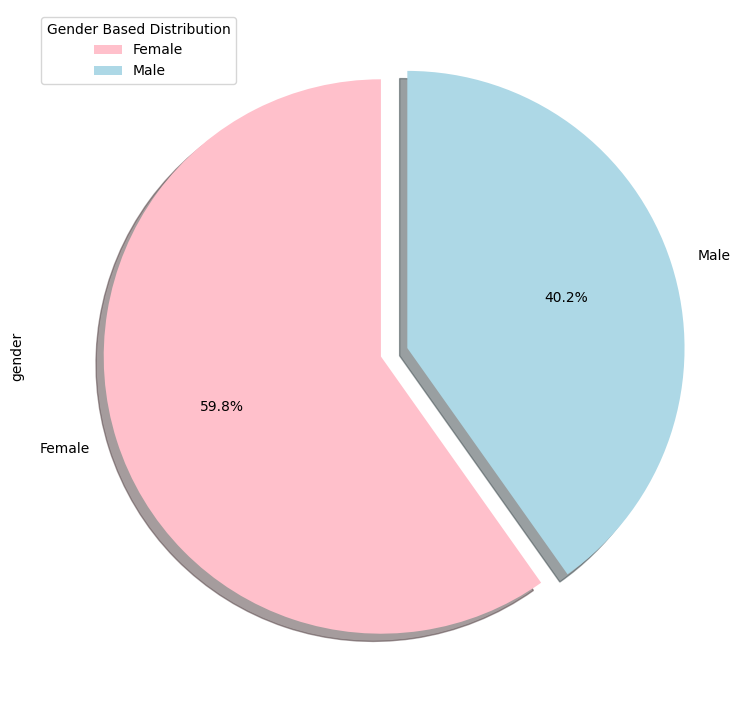

In [9]:
# Distribution of customer based on Gender

df_gbd = df['gender'].value_counts()
plt.figure(figsize=(9, 9))
df_gbd.plot(kind='pie', autopct='%1.1f%%', startangle= 90, explode = [0, 0.1], shadow = True, colors = ['pink', 'lightblue'])
plt.legend(title='Gender Based Distribution')

plt.show()

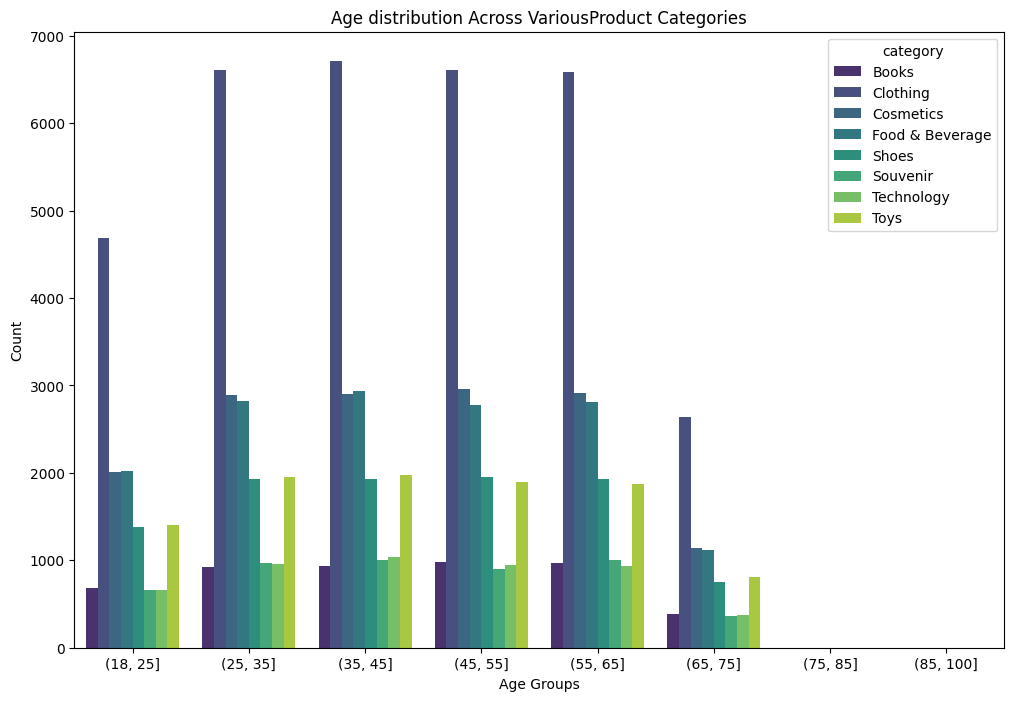

In [10]:
# Age distribution across different product categories

df_ageXcategory = df.groupby(['category', 'age_group']).size().reset_index(name='count')
df_ageXcategory

plt.figure(figsize = (12,8))
sns.barplot(x='age_group',y='count',hue='category',data=df_ageXcategory, palette = 'viridis')
plt.title('Age distribution Across VariousProduct Categories')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

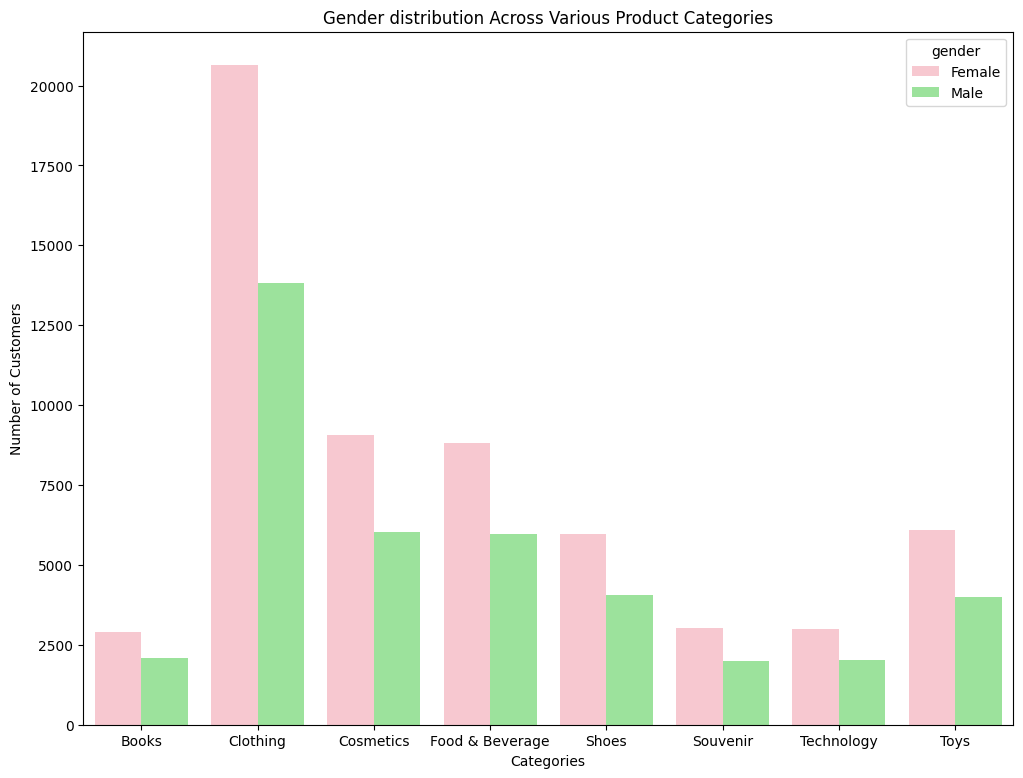

In [11]:
# Gender distribution across different product categories

df_genderXcategory = df.groupby(['gender', 'category']).size().reset_index(name = 'count')
df_genderXcategory
plt.figure(figsize=(12,9))

sns.barplot(x='category', y='count', hue= 'gender', data=df_genderXcategory, palette = ['pink', 'lightgreen'])
plt.title('Gender distribution Across Various Product Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Customers')
plt.show()

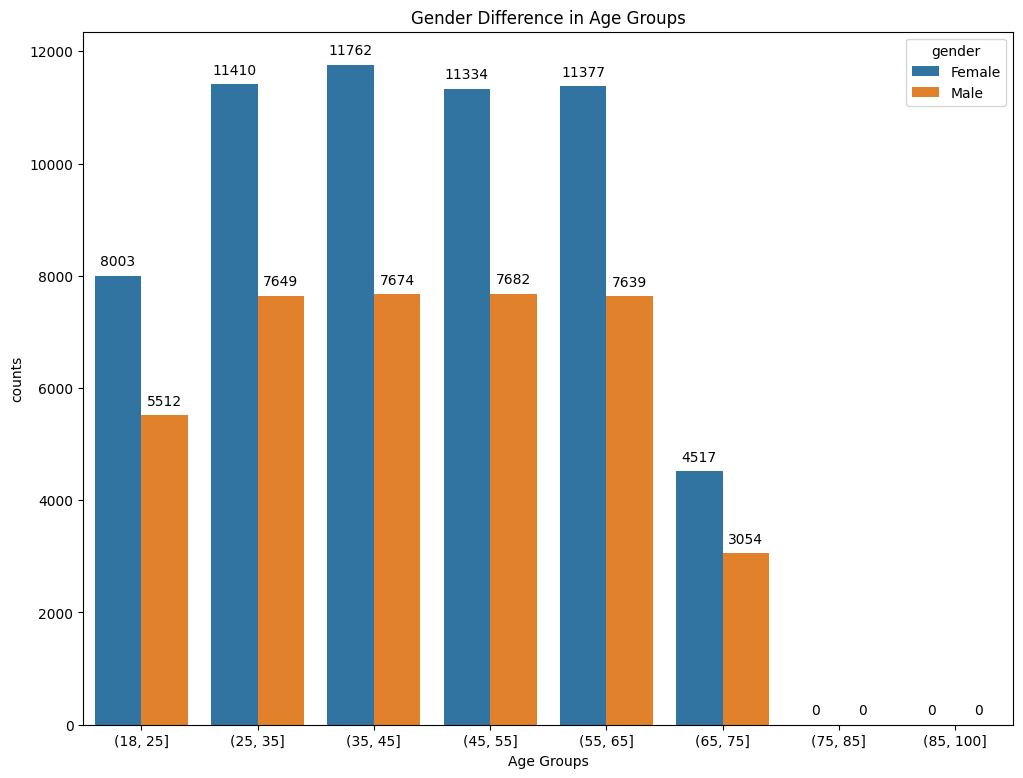

In [12]:
# Gender distribution across different age groups

df_genderXage = df.groupby(['gender', 'age_group']).size().reset_index(name='count')
df_genderXage
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'age_group', y = 'count', hue='gender', data = df_genderXage)

for p in ax.patches:
  total_count = p.get_height()
  ax.annotate(f'{total_count:.0f}', (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),textcoords = 'offset points')

plt.title('Gender Difference in Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('counts')
plt.show()

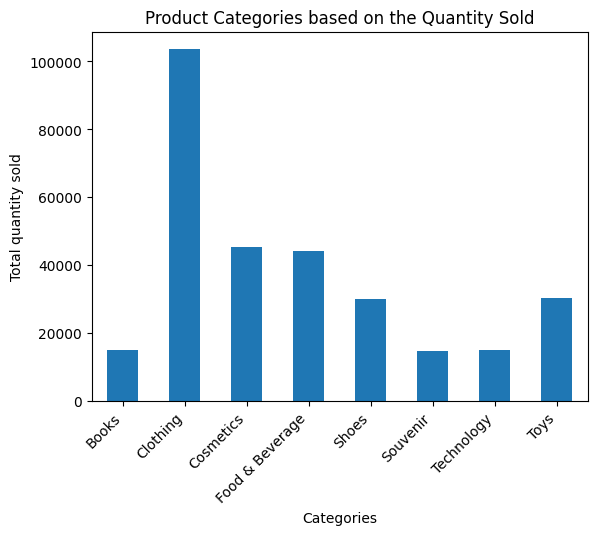

In [13]:
# Product categories based on the quantity sold

df_categoryXquantity = df.groupby('category')['quantity'].sum()
df_categoryXquantity
df_categoryXquantity.sort_index().plot(kind = 'bar')
plt.title('Product Categories based on the Quantity Sold')
plt.xlabel('Categories')
plt.ylabel('Total quantity sold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

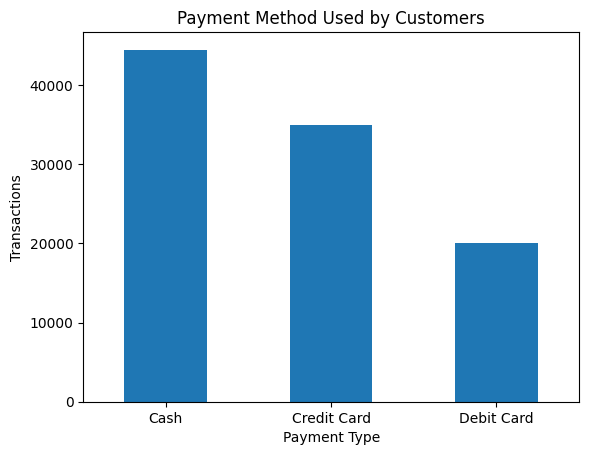

Total payment made by Cash: 44447
Total payment made by Credit Card: 34931
Total payment made by Debit Card: 20079


In [14]:
# Total transaction made by payment method

df_priceXpayment_method = df.groupby('payment_method')['price'].count()
df_priceXpayment_method.sort_index().plot(kind = 'bar')
plt.title('Payment Method Used by Customers')
plt.xlabel('Payment Type')
plt.ylabel('Transactions')
plt.xticks(rotation = 0)
plt.show()
for i, j in df_priceXpayment_method.items():
  print(f"Total payment made by {i}: {j}")

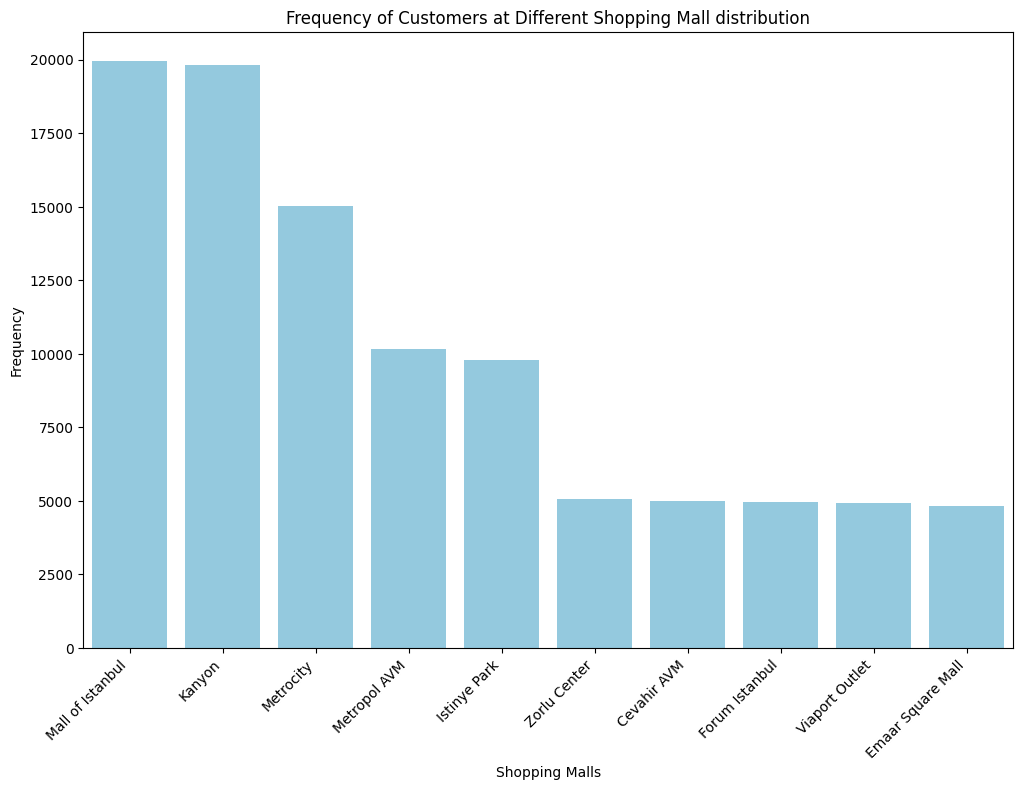

In [15]:
# Shopping Mall distribution. How frequently do customers shop at different shopping malls?

df_shopping_mall = df['shopping_mall'].value_counts()
df_shopping_mall
plt.figure(figsize = (12,8))

sns.barplot(x=df_shopping_mall.index, y=df_shopping_mall.values, color = 'skyblue')

plt.xlabel('Shopping Malls')
plt.ylabel('Frequency')
plt.title('Frequency of Customers at Different Shopping Mall distribution')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

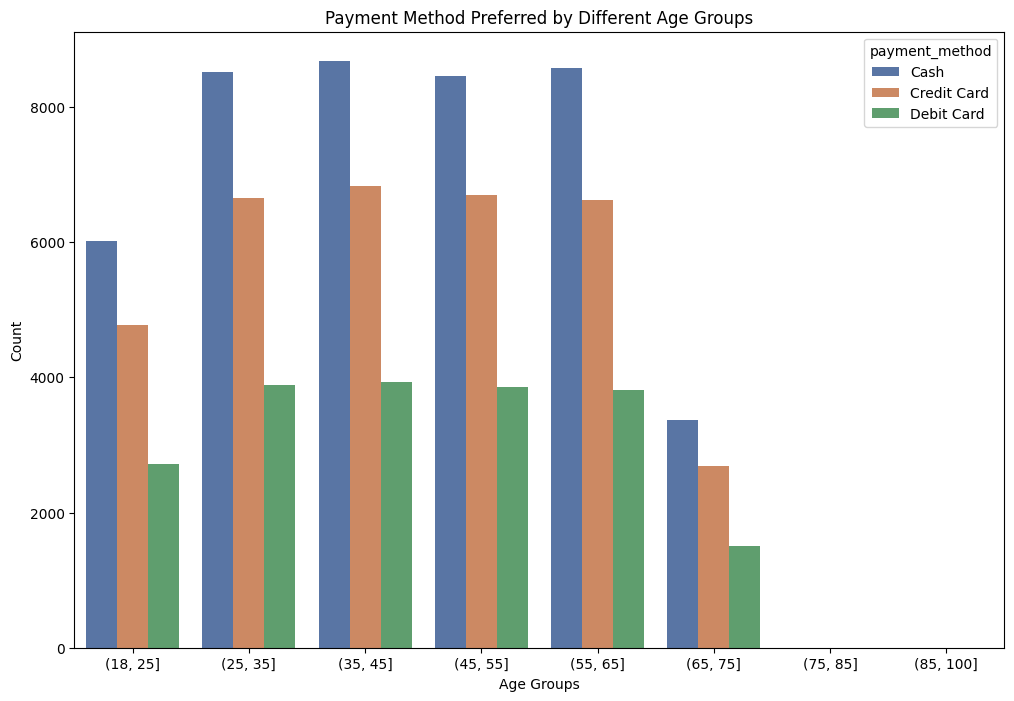

In [16]:
# Are there specific payment methods preferred by different age groups?
df_ageXpayment = df.groupby(['age_group', 'payment_method']).size().reset_index(name = 'count')
df_ageXpayment

plt.figure(figsize = (12,8))
sns.barplot(x= 'age_group', y = 'count', hue = 'payment_method', data = df_ageXpayment,  palette = 'deep')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Payment Method Preferred by Different Age Groups')
plt.show()

In [17]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,"(25, 35]"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,"(18, 25]"
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,"(18, 25]"
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,"(65, 75]"
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,"(45, 55]"


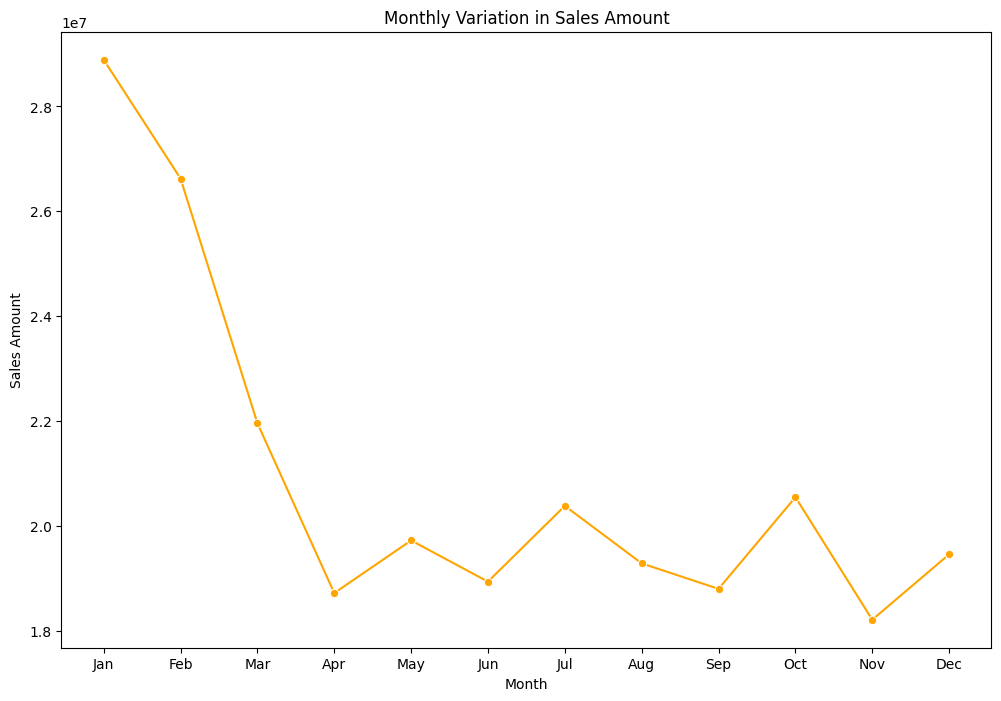

In [18]:
#Analyzing the monthly variation in sales volume.(of all year)

df['sales_amount'] = df['quantity'] * df['price']

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%d/%m/%Y') #convert invoice date to date time format

df['month'] = df['invoice_date'].dt.month

monthly_sales_amount = df.groupby('month')['sales_amount'].sum()

plt.figure(figsize= (12,8))
sns.lineplot(x=monthly_sales_amount.index, y=monthly_sales_amount.values, marker = 'o', color = 'orange')
plt.title('Monthly Variation in Sales Amount')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

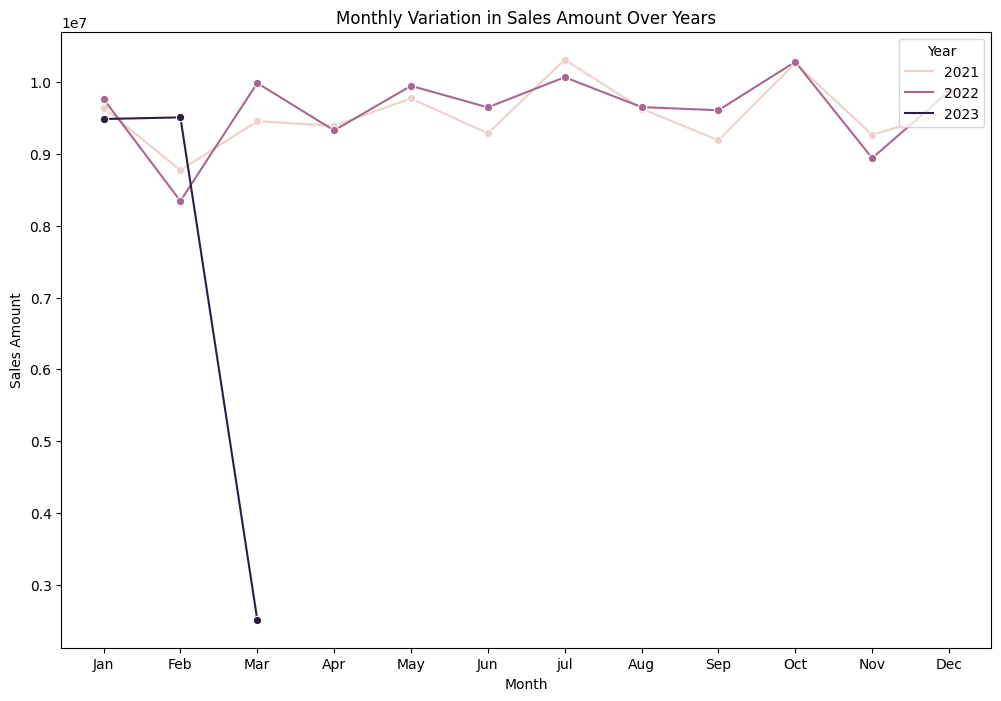

In [19]:
#Analyzing the monthly variation in sales volume.(of each year)
df['year'] = df['invoice_date'].dt.year
monthly_sales_amount = df.groupby(['year','month'], as_index = False).agg({'sales_amount':'sum'})

plt.figure(figsize=(12,8))
sns.lineplot(x = 'month', y = 'sales_amount', hue = 'year', data = monthly_sales_amount, marker='o')
plt.title('Monthly Variation in Sales Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title = 'Year', loc='upper right')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

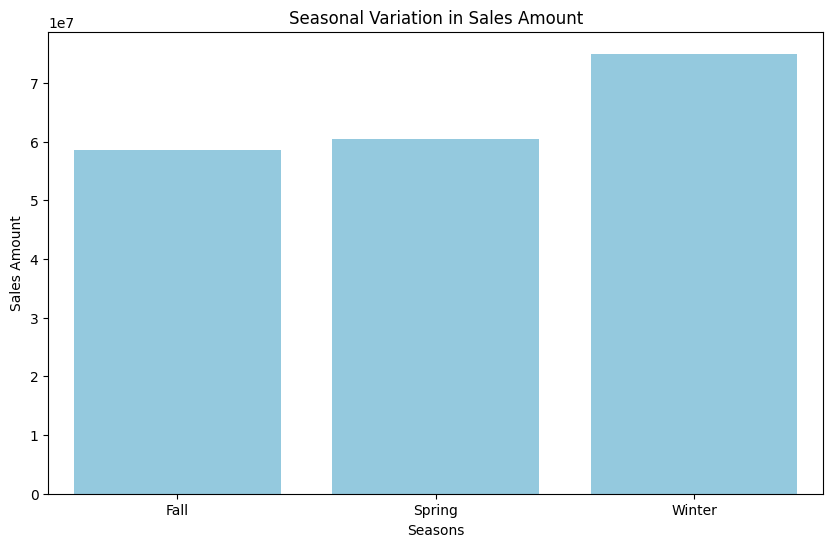

In [20]:
#Identify any significant seasonal trends or patterns in customer shopping behavior.

def map_to_season(month):
  if month in [12, 1 , 2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Fall'

df['seasons'] = df['month'].apply(map_to_season)

seasonal_sales = df.groupby('seasons')['sales_amount'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, color= 'skyblue')
plt.title('Seasonal Variation in Sales Amount')
plt.xlabel('Seasons')
plt.ylabel('Sales Amount')
plt.show()